In [3]:
from fitter.oo import Gauss

In [4]:
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

In [5]:
state = np.random.RandomState(42)
gauss_part = state.normal(1,2,size=100_000)
lin_part = state.uniform(low=-10,high=10,size=50_000)
total_rand = np.concatenate([gauss_part, lin_part])

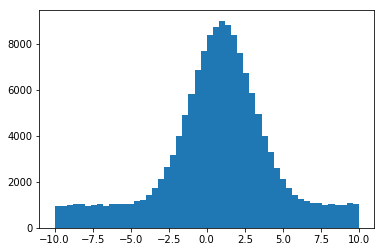

In [6]:
plt.hist(total_rand, bins=50)
plt.show()

In [13]:
fun = Gauss() + Linear()
res = minimize(fun.nll, [.9, 1.8, .5],
              bounds=((None,None),(None,None),(0,1)),
              args=(total_rand,)
              )
res

      fun: 396365.97450377955
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.02328306,  0.01164153,  0.16880222])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 44
      nit: 8
   status: 0
  success: True
        x: array([ 1.00376585,  2.0041559 ,  0.33227403])

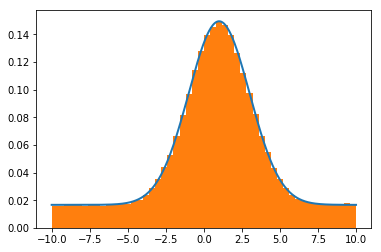

In [14]:
xs = np.linspace(-10,10,500)
plt.plot(xs, fun(xs, *res.x), lw=2)
plt.hist(total_rand, bins=50, density=True)
plt.show()

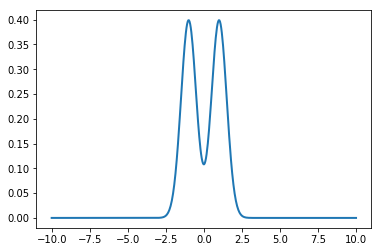

In [17]:
fun = Gauss() + Gauss()
xs = np.linspace(-10,10,500)
plt.plot(xs, fun(xs, 1, .5, -1, .5, .5), lw=2)
plt.show()